# Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'acms80695-384817' # Project ID inserted based on the query results selected to explore
location = 'us-central1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Define a custom color palette with a single black color
black_palette = sns.color_palette(['black'])

# Set the color palette to the custom palette
sns.set_palette(black_palette)

# Set the Style to Darkgrid
sns.set_style("darkgrid")

# Result set loaded from BigQuery job as a DataFrame

In [5]:
# Running this code will read results from your previous job
job = client.get_job('bquxjob_3fde09c8_187db04c836') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
# Filter Out Values with Options Prices Less Than or Equal to 1 Cent or Greater than 10k
results = results[(results['midpoint'] > 0.01) & (results['midpoint'] < 100000)]
# Filter Out Values with Negative Risk Free Rate Values
results = results[results['zero_coupon'] > 0]
# Filter Out Values with Negative Dividend Yields
results = results[results['div_yield'] > 0]
# Preview DataFrame
results.head()

,secid,date,strike_price,impl_volatility,under_price,zero_coupon,div_yield,midpoint,opt_type,time,...,under_lag11,under_lag12,under_lag13,under_lag14,under_lag15,under_lag16,under_lag17,under_lag18,under_lag19,under_lag20
0,101492,1996-08-20,180.0,0.322852,211.560000000,6.439493,0.404400,5.375,0,0.585900,...,198.370000000,186.240000000,184.120000000,180.240000000,181.860000000,187.390000000,187.230000000,184.910000000,186.530000000,189.620000000
1,101492,1996-08-20,195.0,0.312807,211.560000000,6.439493,0.404400,9.375,0,0.585900,...,198.370000000,186.240000000,184.120000000,180.240000000,181.860000000,187.390000000,187.230000000,184.910000000,186.530000000,189.620000000
2,101492,1996-08-20,225.0,0.292291,211.560000000,6.439493,0.404400,22.500,0,0.585900,...,198.370000000,186.240000000,184.120000000,180.240000000,181.860000000,187.390000000,187.230000000,184.910000000,186.530000000,189.620000000
3,100936,1996-08-20,170.0,0.310017,186.460000000,6.439493,0.780606,8.000,0,0.585900,...,186.920000000,180.710000000,180.130000000,179.750000000,171.120000000,171.820000000,175.200000000,172.070000000,172.700000000,175.310000000
4,101501,1996-08-20,195.0,0.200410,214.560000000,6.439493,4.986790,25.375,1,0.835044,...,214.040000000,212.710000000,213.180000000,210.300000000,212.080000000,213.040000000,214.590000000,212.090000000,209.580000000,214.890000000


# Exploratory Data Analysis

In [6]:
results.describe()

,secid,strike_price,impl_volatility,zero_coupon,div_yield,midpoint,opt_type,time
count,10750886.0,1.075089e+07,1.075089e+07,1.075089e+07,1.075089e+07,1.075089e+07,10750886.0,1.075089e+07
mean,116855.101457,1.369924e+03,5.146088e-01,2.902254e+00,2.361179e+00,1.288832e+02,0.50971,5.877868e-01
std,24901.240698,2.406362e+03,4.430403e-01,1.997617e+00,2.044926e+00,3.069273e+02,0.499906,5.346795e-01
min,100910.0,5.000000e+00,1.120200e-02,2.934528e-01,1.070000e-04,1.500000e-02,0.0,2.737851e-03
25%,102434.0,2.750000e+02,2.353610e-01,1.291488e+00,1.271437e+00,6.500000e+00,0.0,2.162902e-01
50%,108105.0,6.200000e+02,3.668820e-01,2.205105e+00,1.877972e+00,3.200000e+01,1.0,5.201916e-01
75%,112878.0,1.495000e+03,6.167400e-01,4.575809e+00,2.535226e+00,1.121000e+02,1.0,7.392197e-01
max,189691.0,2.150000e+04,2.999987e+00,7.631664e+00,1.473539e+02,1.326700e+04,1.0,4.796715e+00


In [7]:
# Rename Columns to More Readable Names
results = results.rename(columns={'midpoint': 'Bid-Ask Midpoint Price', 'zero_coupon': 'Zero Coupon Rate',
                                  'div_yield': 'Dividend Yield', 'impl_volatility': 'Implied Volatility',
                                  'time': 'Time to Maturity (years)', 'strike_price': 'Strike Price',
                                  'under_price': 'Underlying Price', 'opt_type': 'Option Type'})

<Axes: xlabel='Bid-Ask Midpoint Price', ylabel='Count'>

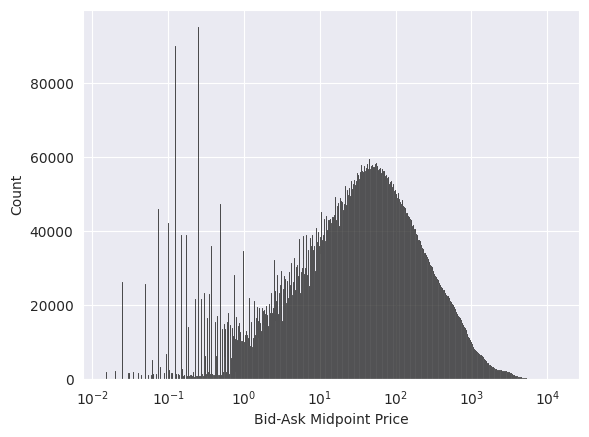

In [8]:
sns.histplot(results['Bid-Ask Midpoint Price'], log_scale=True)

<Axes: xlabel='Strike Price', ylabel='Count'>

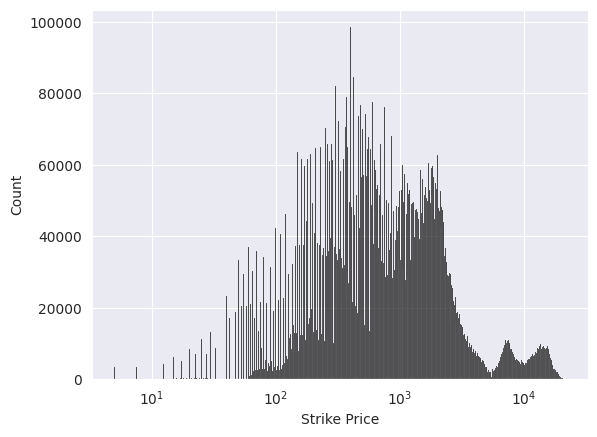

In [9]:
sns.histplot(results['Strike Price'], log_scale=True)

<Axes: xlabel='Implied Volatility', ylabel='Count'>

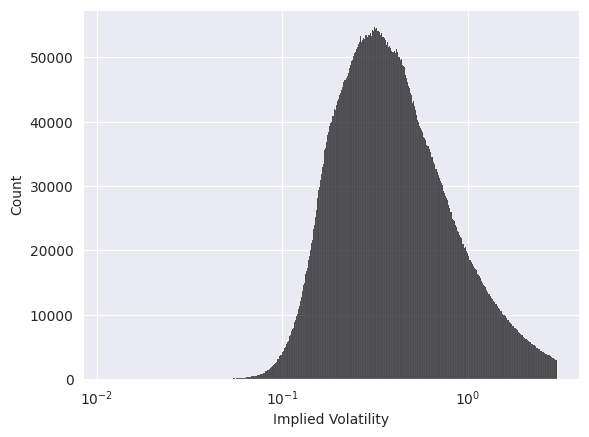

In [10]:
sns.histplot(results['Implied Volatility'], log_scale=True)

<Axes: xlabel='Zero Coupon Rate', ylabel='Count'>

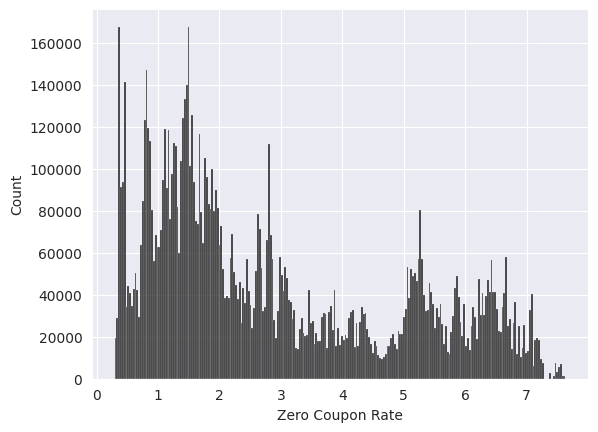

In [11]:
sns.histplot(results['Zero Coupon Rate'])

<Axes: xlabel='Dividend Yield', ylabel='Count'>

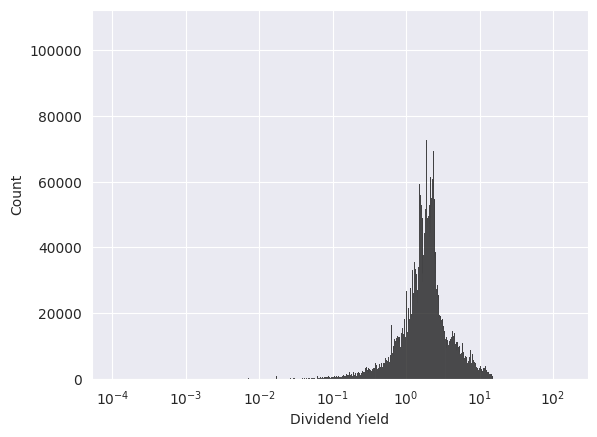

In [12]:
sns.histplot(results['Dividend Yield'], log_scale=True)

<Axes: xlabel='Time to Maturity (years)', ylabel='Count'>

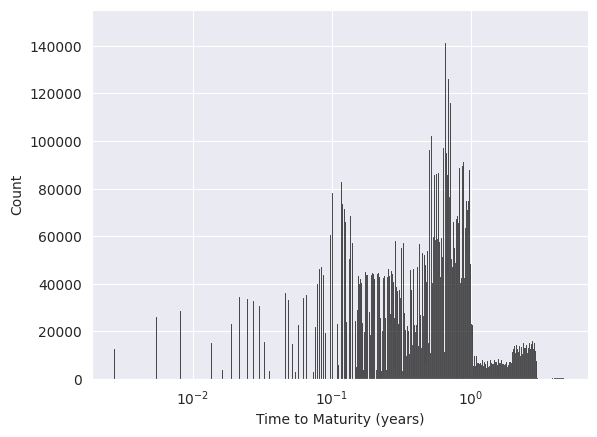

In [13]:
sns.histplot(results['Time to Maturity (years)'], log_scale=True)

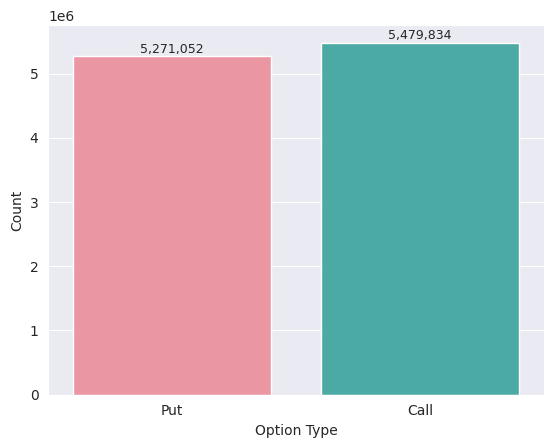

In [14]:
# Revert Option Type to Original Values
results['Option Type'] = results['Option Type'].map({1: 'Call', 0: 'Put'})
# Plot Count of Option Types
ax = sns.countplot(x='Option Type', data=results)
for p in ax.patches:
    ax.annotate("{:,d}".format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=9)
ax.set_ylabel('Count')
plt.show()